<a href="https://colab.research.google.com/github/kimsoohwa/jejumaster/blob/main/2%EC%9D%BC%EC%B0%A8_%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%83%81%EC%B2%AD%EB%82%A0%EC%94%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 탐색적데이터분석

## 4. 공공 데이터 분석-기상청날씨

---

**[주의!] (코랩)한글 폰트 지정하는 방법**

In [31]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 기상청 데이터 분석(종관데이터)

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기 <br>
 [사전준비] 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 1. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 2. 데이터 전처리하기 : 필요한 데이터만 추출하기
 3. 데이터 시각화하기 : 데이터 그래프로 나타내기
 4. 데이터 저장하기 :  파일로 저장하기

---

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [32]:
import pandas  as pd
import numpy as np
import matplotlib as plt
print(pd.__version__)
print(np.__version__)
print(plt.__version__)

1.5.3
1.23.5
3.7.1


---

### 1.데이터 다운로드하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용
- OBS_ASOS_MNH_~.csv 파일 이름을 'weather_data.csv'로 변경해서 사용하기


In [33]:
PATH = './sample_data/'
FILE = 'OBS_ASOS_MNH.csv'


---------

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [34]:
import pandas as pd

file = PATH+FILE
df = pd.read_csv(file, encoding='cp949')

print(type(df))
df.head(2)

<class 'pandas.core.frame.DataFrame'>


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


---

### 2.데이터 전처리(가공하기)
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

#### # 데이터 요약

In [35]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56531 entries, 0 to 56530
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  56531 non-null  int64  
 1   지점명                 56531 non-null  object 
 2   일시                  56531 non-null  object 
 3   평균기온(°C)            55902 non-null  float64
 4   최고기온(°C)            56333 non-null  float64
 5   최저기온(°C)            56308 non-null  float64
 6   평균현지기압(hPa)         54092 non-null  float64
 7   평균상대습도(%)           55335 non-null  float64
 8   월합강수량(00~24h만)(mm)  56238 non-null  float64
 9   평균풍속(m/s)           55373 non-null  float64
 10  합계 일조시간(hr)         55151 non-null  float64
 11  최심적설(cm)            11976 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.2+ MB


#### # 기술통계 정보

In [36]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,56531.000000,55902.000000,56333.000000,56308.000000,54092.000000,55335.000000,56238.000000,55373.000000,55151.000000,11976.000000
mean,187.064478,12.690628,24.374796,2.083866,1005.752401,69.867534,110.791115,2.314299,188.800441,8.185429
std,62.195550,9.166713,8.028924,10.780686,16.166924,9.910797,121.676751,1.286886,46.090836,14.841091
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,135.000000,4.700000,17.900000,-6.500000,1001.100000,63.000000,30.400000,1.400000,159.000000,1.500000
50%,174.000000,13.300000,25.900000,1.400000,1008.500000,71.000000,68.200000,2.000000,189.200000,4.300000
75%,245.000000,20.900000,31.200000,11.500000,1015.800000,77.000000,147.000000,2.900000,219.200000,9.000000
max,295.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


#### # 결측데이터 시각화
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [37]:
!pip install missingno

- **행에 결측 데이터 시각화**

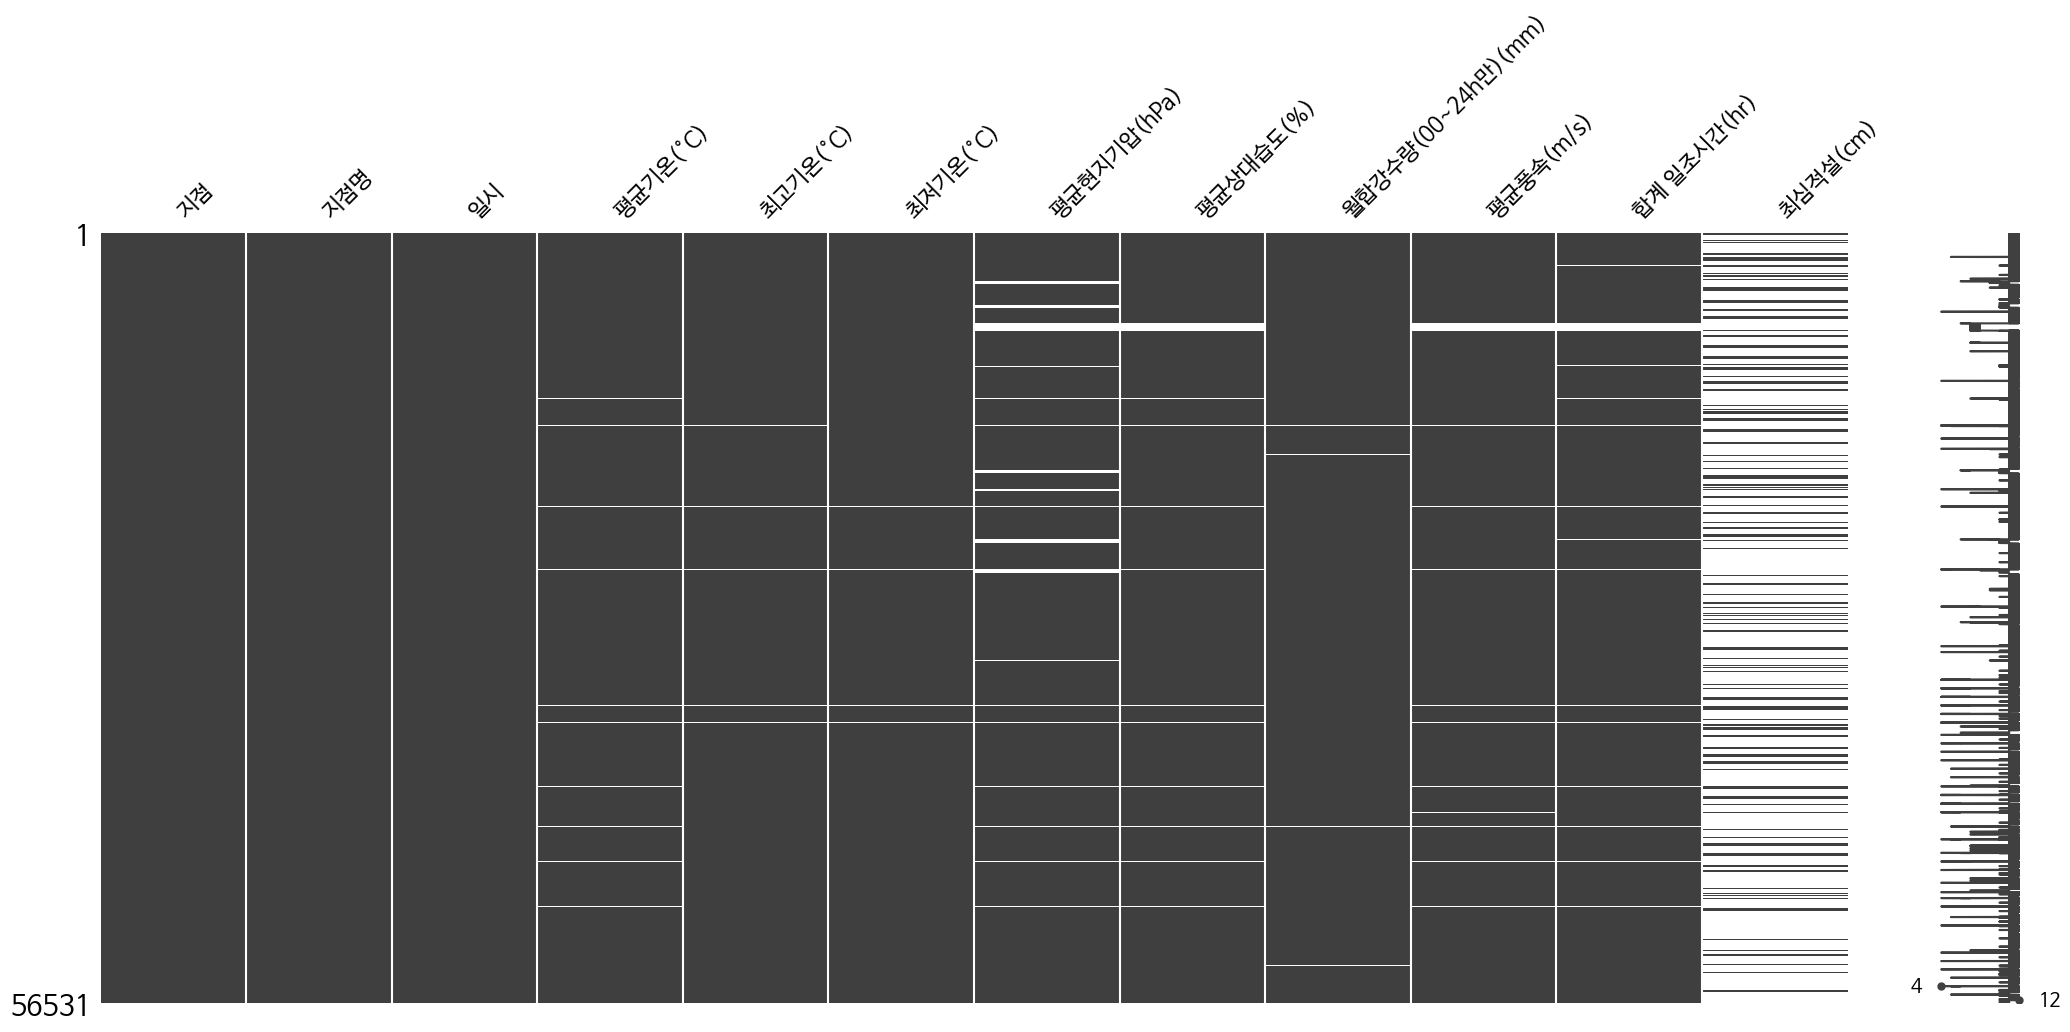

In [38]:
import missingno as msno
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트

msno.matrix(df)
plt.show()

- **열에 결측 데이터 시각화**

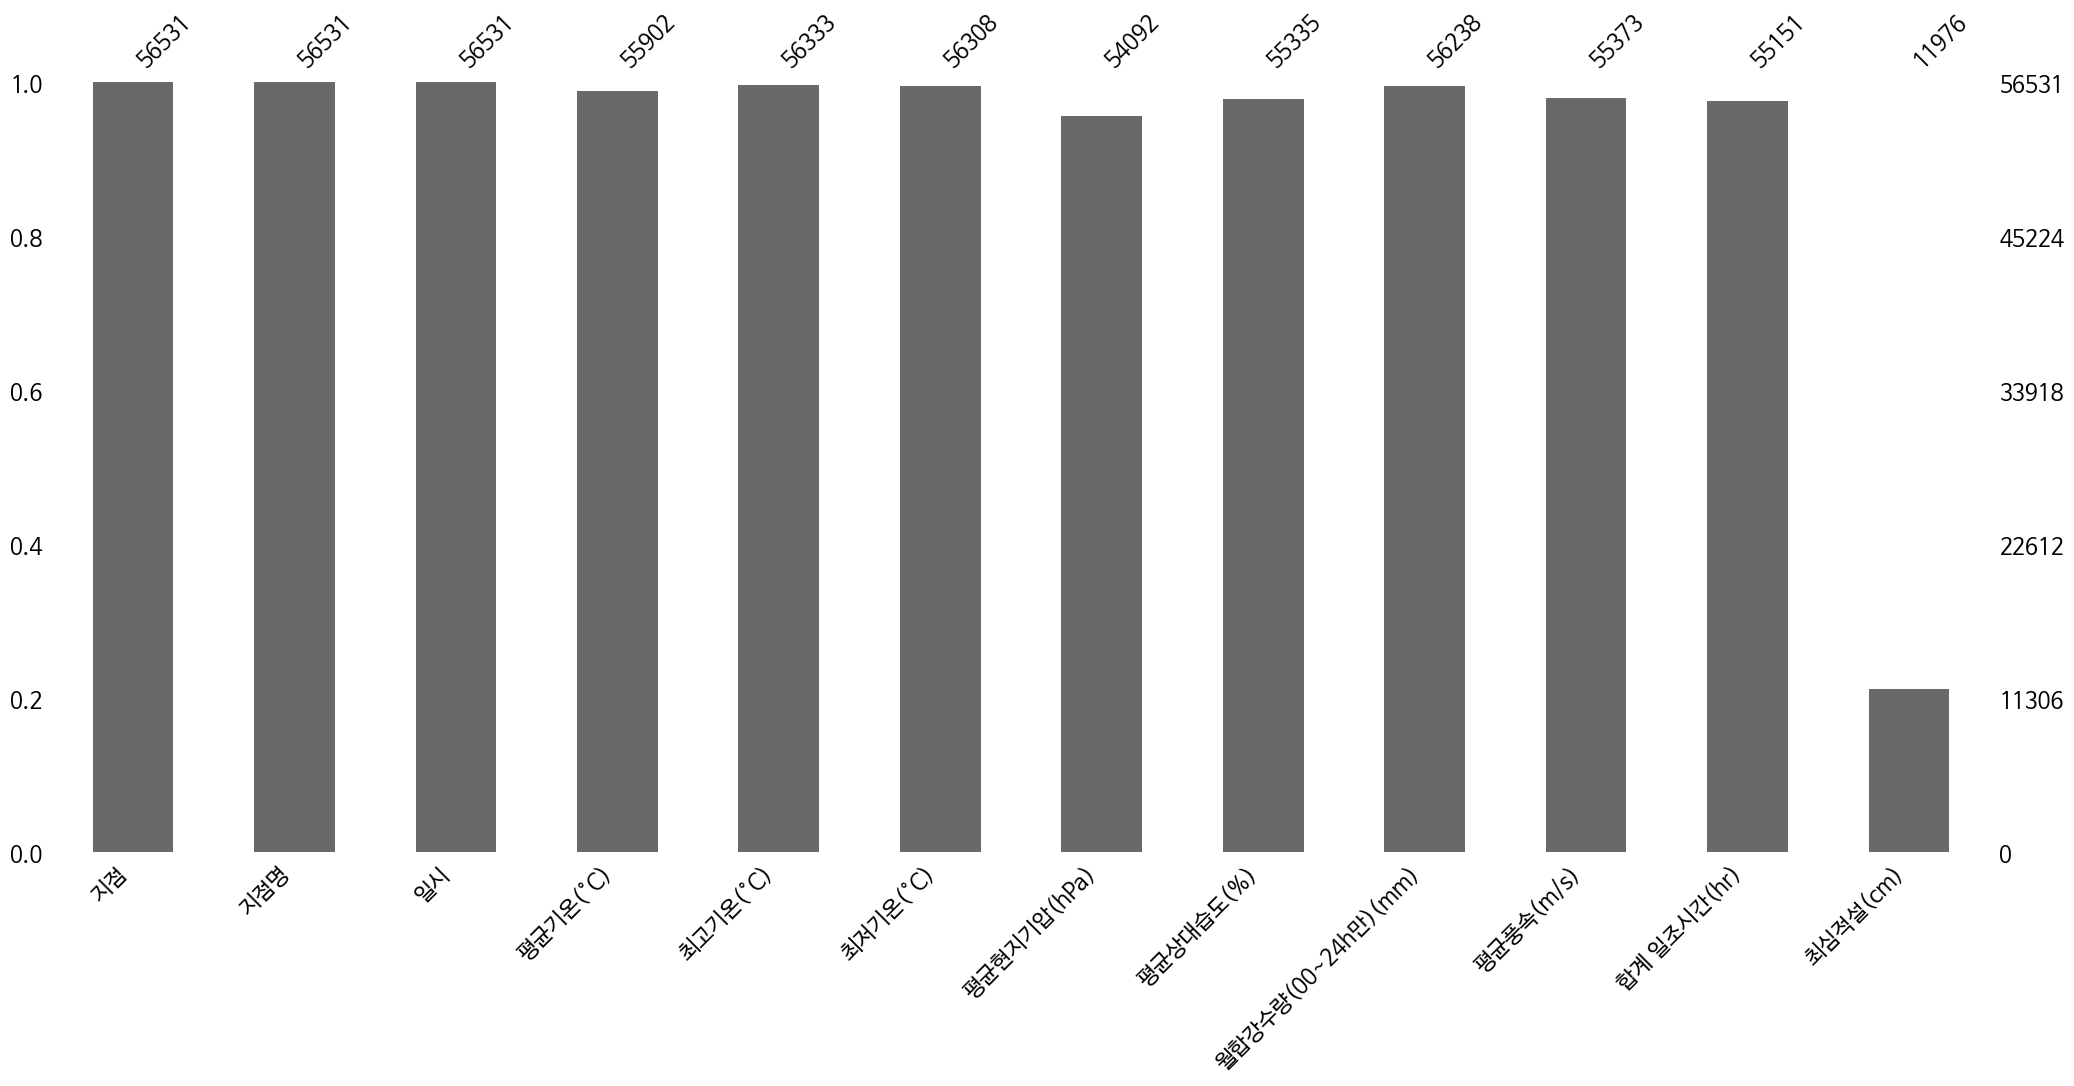

In [39]:
msno.bar(df)
plt.show()

---

#### 2. 컬럼명 변경하기

In [40]:
df.columns#어떤 컬럼들이 있는지 출력
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
       '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']#내가 필요한 형태로 변경함
df.head(3)#date3개로 변경 출력함

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


In [41]:
df[df.지점명.isnull()]


,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설


#### 3. 컬럼 추가하기
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [42]:
#df.index(인덱스위치값,컬럼명,값)
df.insert(3,'신규',df['지점'])
df.head(1)

,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN


In [43]:
df.insert(3,'검색일자',df['일시'])

In [44]:
df.head(3)

,지점,지점명,일시,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968-03,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


- **문자열이 특정 문자 제거**: '검색일자' 값중에 '년도-월-일' 형태로 되어 있는 구조에서  '-'기호를 제거

In [45]:
df['검색일자']= df['검색일자'].str.replace(pat=r'-',repl=r'',regex=True)
df.head(2)

,지점,지점명,일시,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,196801,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,196802,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [46]:
df['검색일자'] = df['검색일자'].apply('int64')
df.dtypes

지점          int64
지점명        object
일시         object
검색일자        int64
신규          int64
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
dtype: object

- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [47]:
df['검색일자'] = df['검색일자'].apply(str)
df.dtypes

지점          int64
지점명        object
일시         object
검색일자       object
신규          int64
평균기온      float64
최고기온      float64
최저기온      float64
평균현지기압    float64
평균상대습도    float64
월합강수량     float64
평균풍속      float64
일조시간      float64
최심적설      float64
dtype: object

In [48]:
# 년월 추가
df.insert(3,'년도',df['일시'].str[0:4])
df

,지점,지점명,일시,년도,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,196801,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,196802,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,196803,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968,196804,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968,196805,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56526,295,남해,2023-06,2023,202306,295,22.5,30.6,15.8,1002.4,78.0,364.9,1.2,192.6,NaN
56527,295,남해,2023-07,2023,202307,295,25.4,33.5,20.2,1003.5,88.0,709.8,1.1,99.8,NaN
56528,295,남해,2023-08,2023,202308,295,27.1,35.1,22.4,1000.2,82.0,404.2,NaN,206.7,NaN
56529,295,남해,2023-09,2023,202309,295,23.8,31.1,17.1,1007.3,82.0,280.9,1.4,148.8,NaN


#### 4. 컬럼 삭제

In [49]:
df.drop('신규', axis=1, inplace=True)
df.drop('검색일자', axis=1, inplace=True)
df.head(3)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


#### 5. 특정 조건 검색

In [50]:
print( '#지점명 개수: ', len( set(df['지점명']) ) )
print( '#지점명: ', set( df['지점명'] ) )

#지점명 개수:  103
#지점명:  {'흑산도', '순천', '울진', '영광군', '진도(첨찰산)', '서청주', '경주시', '합천', '전주', '북창원', '광양시', '거창', '관악산', '무안', '제주', '목포', '정선군', '진주', '인제', '대구(기)', '임실', '보은', '남해', '강진군', '정읍', '함양군', '주암', '천안', '속초', '홍천', '의성', '군산', '부산', '장수', '부안', '문경', '고산', '진도군', '포항', '영월', '거제', '서울', '양산시', '금산', '동두천', '통영', '부여', '강화', '영덕', '제천', '서산', '의령군', '상주', '울산', '충주', '남원', '철원', '강릉', '대구', '고창', '춘천', '구미', '보성군', '안동', '고흥', '태백', '영주', '대관령', '파주', '세종', '이천', '봉화', '영천', '추풍령', '서귀포', '청송군', '성산', '동해', '밀양', '장흥', '울릉도', '홍성', '보령', '김해시', '청주', '고창군', '산청', '백령도', '순창군', '대전', '창원', '성산포', '삼척', '원주', '해남', '광주', '수원', '여수', '완도', '북강릉', '인천', '북춘천', '양평'}


In [51]:
df_2023 = df.query(" 년도 == '2023' ")

In [52]:
print( '#지점명 개수: ', len( set(df_2023['지점명']) ) )
print( '#지점명: ', set( df_2023['지점명'] ) )

#지점명 개수:  96
#지점명:  {'흑산도', '순천', '울진', '영광군', '서청주', '경주시', '합천', '전주', '북창원', '광양시', '거창', '제주', '목포', '정선군', '진주', '인제', '임실', '보은', '남해', '강진군', '정읍', '함양군', '천안', '속초', '홍천', '의성', '군산', '부산', '장수', '부안', '문경', '고산', '진도군', '포항', '영월', '거제', '서울', '양산시', '금산', '동두천', '통영', '부여', '강화', '영덕', '제천', '서산', '의령군', '상주', '울산', '충주', '남원', '철원', '강릉', '대구', '고창', '춘천', '구미', '보성군', '안동', '고흥', '태백', '영주', '대관령', '파주', '세종', '이천', '봉화', '영천', '추풍령', '서귀포', '청송군', '성산', '동해', '밀양', '장흥', '울릉도', '홍성', '보령', '김해시', '청주', '고창군', '산청', '백령도', '순창군', '대전', '창원', '원주', '해남', '광주', '수원', '여수', '완도', '북강릉', '인천', '북춘천', '양평'}


- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [53]:
# df[df.지점명 == '제주' ]#3가지 방법중 가장 많이 씀

df.query(" 지점명 == '제주' ")

# df.iloc[ df.index[ df['지점명'] == '제주' ] ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28696,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28697,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
28698,184,제주,1923-07,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
28699,184,제주,1923-08,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
28700,184,제주,1923-09,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29897,184,제주,2023-06,2023,23.4,31.4,15.8,1005.6,76.0,213.0,3.1,170.2,NaN
29898,184,제주,2023-07,2023,28.1,37.3,21.8,1005.6,75.0,273.2,3.0,124.6,NaN
29899,184,제주,2023-08,2023,28.8,34.8,21.6,1002.5,73.0,182.5,3.1,242.9,NaN
29900,184,제주,2023-09,2023,25.5,33.3,18.2,1009.6,71.0,84.5,2.8,182.6,NaN


- **또는(|) , 포함(in)** 조건 사용: 제주 또는 서귀포 데이터 추출

In [56]:
# 또는(|) 사용
df.query(" 지점명=='제주' | 지점명=='서귀포' ")
df.head()

df.query(" 지점명=='제주' | 지점명=='서귀포' ").head()
df.query(" 지점명 in ('제주','서귀포') ").head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28696,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28697,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN


- **그리고(&)** 조건 사용

In [55]:
df[ (df.지점명 == '제주' ) & (df.최고기온 >30) ]

df.query(" 지점명=='제주' & 최저기온 <= 0 ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28703,184,제주,1923-12,1923,6.8,17.5,-1.7,NaN,67.0,35.9,10.6,101.0,NaN
28704,184,제주,1924-01,1924,5.2,14.7,-2.4,NaN,71.0,45.6,9.0,105.6,NaN
28705,184,제주,1924-02,1924,4.9,21.0,-2.7,NaN,71.0,92.8,10.8,90.5,NaN
28706,184,제주,1924-03,1924,5.6,16.6,-1.0,NaN,66.0,9.4,8.6,183.8,NaN
28715,184,제주,1924-12,1924,6.7,16.5,-0.3,NaN,74.0,24.6,9.0,89.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29869,184,제주,2021-02,2021,9.4,23.7,-1.2,1019.4,62.0,52.8,3.9,141.2,1.8
29879,184,제주,2021-12,2021,8.9,17.4,-0.5,1023.2,67.0,31.4,4.2,85.9,4.4
29881,184,제주,2022-02,2022,5.6,16.2,0.0,1024.1,62.0,25.1,4.1,92.3,0.3
29891,184,제주,2022-12,2022,6.9,14.6,-0.4,1022.7,66.0,35.3,4.5,48.7,2.7


### [실습문제] 기상관측 데이터에서 특징 데이터 찾기
- 기상관측 지점이 제주인 데이터
- 가장 더웠던 년도, 월, 기온은?
- 가장 웠던 년도, 월, 기온은?

In [57]:
# 포함(in) 사용
df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28696,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28697,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
28698,184,제주,1923-07,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
28699,184,제주,1923-08,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
28700,184,제주,1923-09,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48122,265,성산포,2006-11,2006,14.3,24.1,4.9,1016.6,68.0,85.5,3.8,141.5,NaN
48123,265,성산포,2006-12,2006,8.5,17.3,0.2,1023.0,69.0,90.5,3.0,115.1,0.3
48124,265,성산포,2007-01,2007,6.9,14.6,0.6,1023.0,66.0,46.3,3.3,109.2,1.7
48125,265,성산포,2007-02,2007,9.1,17.7,0.5,1018.0,67.0,60.7,3.7,164.2,2.8


- **min()** : 최초 측정월, 마지막 측정월

In [58]:
# 측정월 최소, 최대
print ( '최초 측정일시: ', min(df['일시']) )
print ( '최초 측정일시: ', df['일시'].min() )
print ( '최근 측정일시: ', max(df['일시']) )
print ( '최근 측정일시: ', df['일시'].max() )

# 측정 최초월('1904-04')의 데이터
df['일시'].min()
df.query(" 일시 == '1904-04-01'")

df.query(f" 일시 == '{ df['일시'].min() }' ")

df[ df['일시'] == df['일시'].min() ]

최초 측정일시:  1904-04
최초 측정일시:  1904-04
최근 측정일시:  2023-10
최근 측정일시:  2023-10


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6633,112,인천,1904-04,1904,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN
22495,159,부산,1904-04,1904,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN
24692,165,목포,1904-04,1904,NaN,20.2,NaN,NaN,NaN,34.7,NaN,NaN,NaN


- **max()** : 최근 측정 월 검색

In [59]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
669,90,속초,2023-10,2023,16.5,25.5,6.3,1015.1,59.0,31.4,1.8,187.6,NaN
754,93,북춘천,2023-10,2023,12.6,23.5,-0.2,1007.7,82.0,25.9,0.9,173.7,NaN
1184,95,철원,2023-10,2023,12.6,22.8,-0.4,1000.7,79.0,30.5,0.9,197.9,NaN
1494,98,동두천,2023-10,2023,13.7,23.6,1.5,1004.9,77.0,38.5,0.8,174.1,NaN
1756,99,파주,2023-10,2023,13.1,24.0,-0.5,1015.6,83.0,46.5,1.0,173.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54061,285,합천,2023-10,2023,15.4,25.9,3.7,1014.9,71.0,6.3,0.6,187.1,NaN
54672,288,밀양,2023-10,2023,15.8,25.4,4.3,1016.7,66.0,9.2,0.7,198.3,NaN
55290,289,산청,2023-10,2023,14.7,26.1,3.8,1002.9,74.0,8.0,1.3,179.1,NaN
55909,294,거제,2023-10,2023,16.8,24.4,7.1,1012.9,69.0,4.2,1.1,178.4,NaN


In [60]:
df.query(f" 지점명 == '제주' & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29901,184,제주,2023-10,2023,19.7,26.1,13.3,1016.1,60.0,36.0,3.1,190.1,NaN


In [61]:
df.query(f" 지점명 in ('제주','성산','고산','성산포','서귀포') & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29901,184,제주,2023-10,2023,19.7,26.1,13.3,1016.1,60.0,36.0,3.1,190.1,NaN
30331,185,고산,2023-10,2023,19.2,25.7,14.3,1009.8,64.0,2.8,5.9,194.7,NaN
31380,188,성산,2023-10,2023,18.6,26.5,10.7,1016.1,68.0,40.5,2.5,177.3,NaN
32134,189,서귀포,2023-10,2023,20.1,26.3,13.6,1012.1,59.0,5.9,1.7,214.4,NaN


### [실습]: 가장 더웠던 날짜와 온도는?
- 기상관측 데이터에서 가장 더웠던(추웠던) 해와 기온은?

In [62]:
# 컬럼 추출
df['최고기온'].max()
df.최고기온.max()


# 행 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ")
df[ df.최고기온 == df.최고기온.max() ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
35868,212,홍천,2018-08,2018,27.2,41.0,15.8,991.7,73.0,300.6,1.4,234.4,NaN


In [63]:
# 행 추출 특정 컬럼값(year) 추출
print(f'기상관측 데이터를 통해 가장 더웠던 년도는?')
print(df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4] )


yymm = df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:7]
yymm = df[ df.최고기온 == df.최고기온.max() ].일시.str[0:7]
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

기상관측 데이터를 통해 가장 더웠던 년도는?
35868    2018
Name: 일시, dtype: object
기상관측 데이터를 통해 가장 더웠던 년-월: 35868    2018-08
Name: 일시, dtype: object


35868    41.0
Name: 최고기온, dtype: float64

In [64]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명']

# # 측정 지점이 제주인  최고기온
df.query(f" 지점명=='제주' ")['최고기온'].max()


# 측정 지점이 제주 전역의   최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()

37.5

### [실습]: 가장 추웠던 날짜와 온도는?

In [65]:
field = '최저기온'

# 전체 최저기온
df.query(f" {field} <= { df[field].min() } ")

# 전체 최저기온 일시
df.query(f" {field} <= { df[field].min() } ")['일시'].str[0:4]

# 전체 최저기온 지점명
df.query(f" {field} <= { df[field].min() } ")['지점명']

# 측정 지점이 제주인 최저기온
df.query(f" 지점명=='제주' ")[field].min()

# 측정 지점이 제주 전역의  최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()

-7.0

###  [실습] : '제주'에서 가장 더웠던 날짜와 기온?

In [66]:
wmax = df.query(" 지점명 == '제주' ")['최고기온'].max()
print(wmax)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최고기온 >= { wmax }")


wmax = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최고기온 >= { wmax }")

37.5


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28926,184,제주,1942-07,1942,27.0,37.5,17.8,1008.8,78.0,15.5,3.0,347.2,NaN
29887,184,제주,2022-08,2022,29.2,37.5,21.2,1005.8,75.0,124.3,3.1,232.4,NaN


In [68]:
# 서울에서 가장 더웠던 년도와 기온
wmax = df.query(" 지점명 in ('관악산','서울') ")['최고기온'].max()
df.query(f" 지점명 in ('관악산','서울') and 최고기온 >= { wmax }")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6570,108,서울,2018-08,2018,28.8,39.6,20.2,997.4,65.0,202.6,1.7,232.5,NaN


###  [실습] : '제주'에서 가장 추웠던 날짜와 기온은?

In [67]:
wmin = df.query(" 지점명 == '제주' ")['최저기온'].min()
print(wmin)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최저기온 <= { wmin  } ")

wmin = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최저기온 <= { wmin  } ")

-6.0


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
30540,187,성산,1990-01,1990,4.3,17.7,-7.0,1017.4,72.0,118.3,3.1,99.1,7.6
30975,188,성산,1990-01,1990,4.3,17.7,-7.0,1017.4,72.0,118.3,3.1,99.1,7.6
47920,265,성산포,1990-01,1990,4.3,17.7,-7.0,1017.4,72.0,118.3,3.1,99.1,7.6


In [69]:
# 서울에서 가장 추웠던 년도와 기온
wmin = df.query(" 지점명 in ('관악산','서울') ")['최저기온'].min()
df.query(f" 지점명 in ('관악산','서울') and 최저기온 <= { wmin  } ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
5497,108,서울,1927-12,1927,-2.0,10.2,-23.1,1023.0,68.0,43.6,1.9,150.6,19.5


--------

### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [70]:
df.groupby(['지점명'], as_index=False).mean()
df.groupby('지점명').mean()

<ipython-input-70-5011cd9e8b27>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['지점명'], as_index=False).mean()
<ipython-input-70-5011cd9e8b27>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('지점명').mean()


,지점,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
지점명,,,,,,,,,,
강릉,105.0,12.606011,25.031760,2.314157,1013.724805,64.030030,112.426032,2.907958,190.136981,17.191809
강진군,259.0,13.913855,25.175000,3.583333,1015.141566,72.066265,120.326190,2.326347,183.461905,7.450000
강화,201.0,11.178525,22.469952,0.206462,1012.316230,70.472131,108.273059,1.741967,202.794243,4.911034
거제,294.0,14.239836,24.389159,4.652913,1012.951475,66.893443,156.675288,1.780000,196.906908,3.147727
거창,284.0,11.829836,25.135057,-0.290307,989.849408,70.039344,105.969756,1.338197,200.030921,5.467901
...,...,...,...,...,...,...,...,...,...,...
합천,285.0,13.089508,26.088852,1.333607,1012.781938,67.970492,107.581250,1.203612,195.472533,3.942857
해남,261.0,13.452459,24.546326,2.599201,1013.490164,74.449180,109.374392,2.102463,194.272697,4.406107
홍성,177.0,12.919792,24.607292,1.778125,1013.580208,75.395833,102.205208,1.518750,204.032292,4.663158


In [ ]:
df.groupby(['지점명'], as_index=False).count()

#### #그룹핑(컬럼1개): 지점별  평균기온

In [71]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

지점명
강릉     12.606011
강진군    13.913855
강화     11.178525
거제     14.239836
거창     11.829836
         ...    
합천     13.089508
해남     13.452459
홍성     12.919792
홍천     10.603443
흑산도    13.634161
Name: 평균기온, Length: 103, dtype: float64

In [72]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

지점명
강릉     12.606011
강진군    13.913855
강화     11.178525
거제     14.239836
거창     11.829836
         ...    
합천     13.089508
해남     13.452459
홍성     12.919792
홍천     10.603443
흑산도    13.634161
Name: 평균기온, Length: 103, dtype: float64

In [ ]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

In [ ]:
# 방법4
df.groupby('지점명').aggregate({'평균기온':'mean'})

In [ ]:
df_temp = df.groupby('지점명').aggregate({'평균기온':'mean'})
df_temp.plot()

#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [73]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

평균기온
지점명 년도             
강릉  1911        NaN
    1912  11.733333
    1913  11.683333
    1914  13.175000
    1915  12.091667
...             ...
흑산도 2019  14.066667
    2020  14.100000
    2021  15.258333
    2022  13.983333
    2023  15.320000

[4751 rows x 1 columns]

In [ ]:
df_temp = df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df_temp.plot()

### [실습문제] : 지점별 최고기온?

In [74]:
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})

df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})
df.groupby('지점명').aggregate({'최고기온':'max'})

,최고기온
지점명,
강릉,39.4
강진군,37.4
강화,35.8
거제,38.6
거창,37.8
...,...
합천,39.5
해남,37.2
홍성,37.0


- 인텍스를 초기화 하는 방법

In [75]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

,지점명,최고기온
0,강릉,39.4
1,강진군,37.4
2,강화,35.8
3,거제,38.6
4,거창,37.8
...,...,...
98,합천,39.5
99,해남,37.2
100,홍성,37.0
101,홍천,41.0


### [실습문제] : 지점별 년도별 최다 월합강수량?

In [76]:
df.groupby(['지점명','년도'])['월합강수량'].agg(**{'최다월합강수량':'max'})
df.groupby(['지점명','년도']).aggregate({'월합강수량':'max'})

월합강수량
지점명 년도         
강릉  1911   36.5
    1912  346.1
    1913  232.5
    1914  383.4
    1915  302.3
...         ...
흑산도 2019  201.7
    2020  305.2
    2021  176.0
    2022  131.4
    2023  590.5

[4751 rows x 1 columns]

### [실습문제]  제주 전역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

In [77]:
df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'최고기온':'max',
                                          '최저기온':'min',
                                          '월합강수량':'max',
                                          '최심적설':'max'})

df2.to_csv(PATH+'제주-년도별-날씨정보.csv', encoding='cp949')
df2

최고기온  최저기온  월합강수량  최심적설
지점명 년도                           
고산  1988  30.5  -2.1  207.4   0.5
    1989  30.5  -1.0  273.2   0.3
    1990  32.4  -3.5  205.8   2.7
    1991  31.4  -3.0  368.2   1.0
    1992  31.7   0.2  326.6   NaN
...        ...   ...    ...   ...
제주  2019  35.4   1.0  610.6   NaN
    2020  36.3  -1.4  400.5   2.1
    2021  34.2  -3.1  493.1   9.2
    2022  37.5  -0.4  265.8   2.7
    2023  37.3  -3.4  273.2   3.7

[290 rows x 4 columns]

#### # DataFrame에서 한 행씩 불러오기
!!![주의]!!! 데이터가 많을 경우 실행하지 않도록

In [78]:
# 한 행씩 불러오기  ---->
# for i, row in df_t.iterrows():
#     print(i, row)
#     print(i, row['지점명'], row['최고기온'])

#### 6.가공된 파일 신규 저장하기

In [80]:
# 가공된 데이터 신규 파일로 저장하기
file = PATH+'weather_data2.csv'
df.to_csv(file, encoding='cp949', mode='w', index=True)

--------------------------

## 3. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

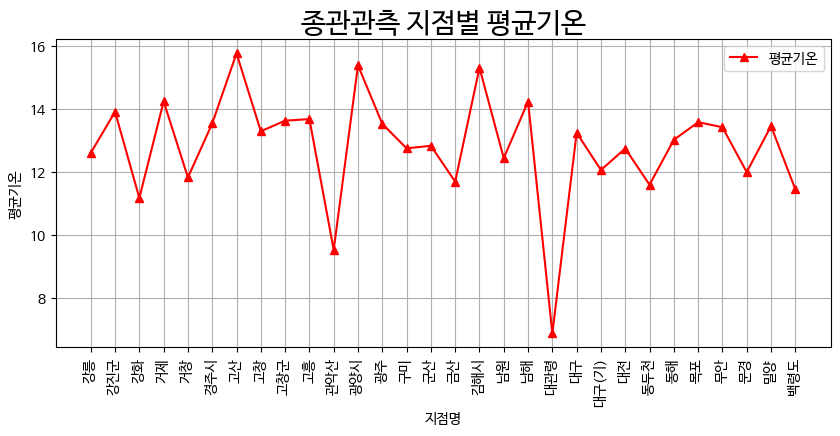

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = PATH+FILE
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.지점별 평균 구하기(지점 30개만 추출)
df_ = df.groupby('지점명').aggregate({'평균기온':'mean'}).head(30)

plt.plot(df_, '^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

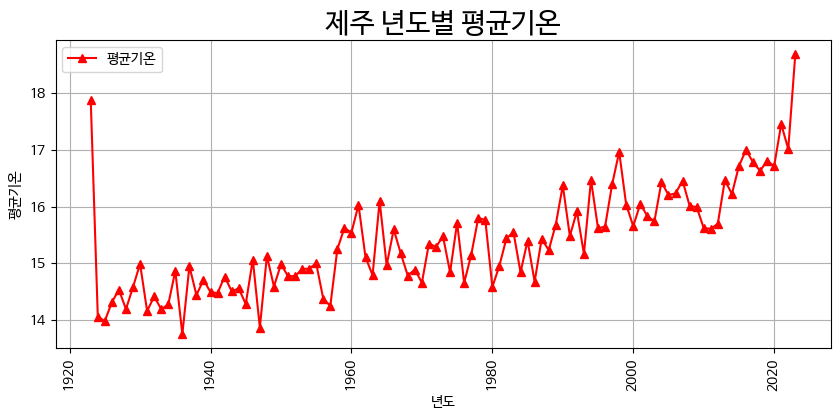

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = PATH+'weather_data2.csv'
df = pd.read_csv(file, encoding='CP949')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df


# 2,지점별 연도별 그룹핑하기
df2 = df.query(" 지점명 == '제주' ")
# df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'평균기온':'mean'}).reset_index()

X = df2.년도
Y = df2.평균기온

# 3.지점별 평균 구하기(지점 30개만 추출)
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 년도별 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

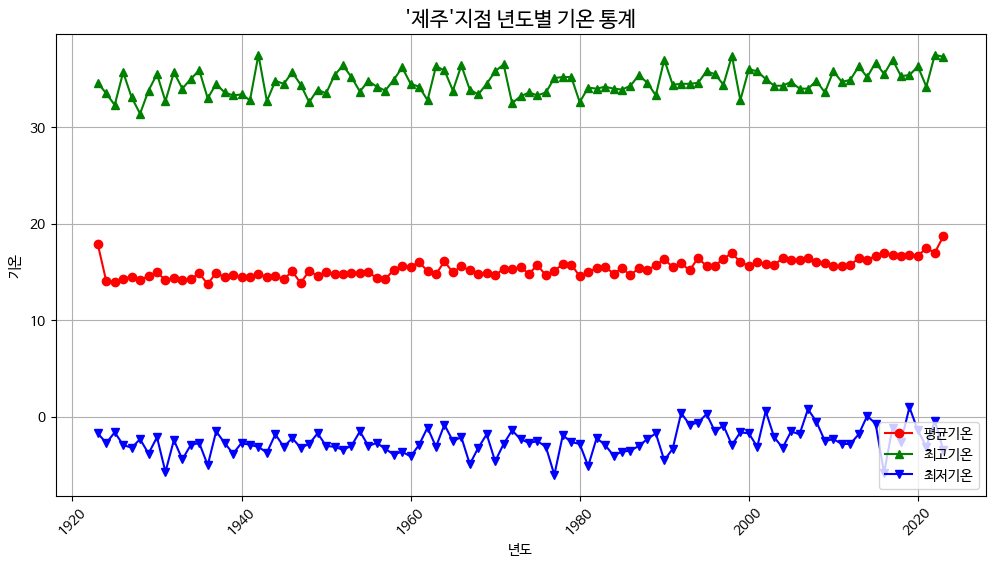

In [83]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


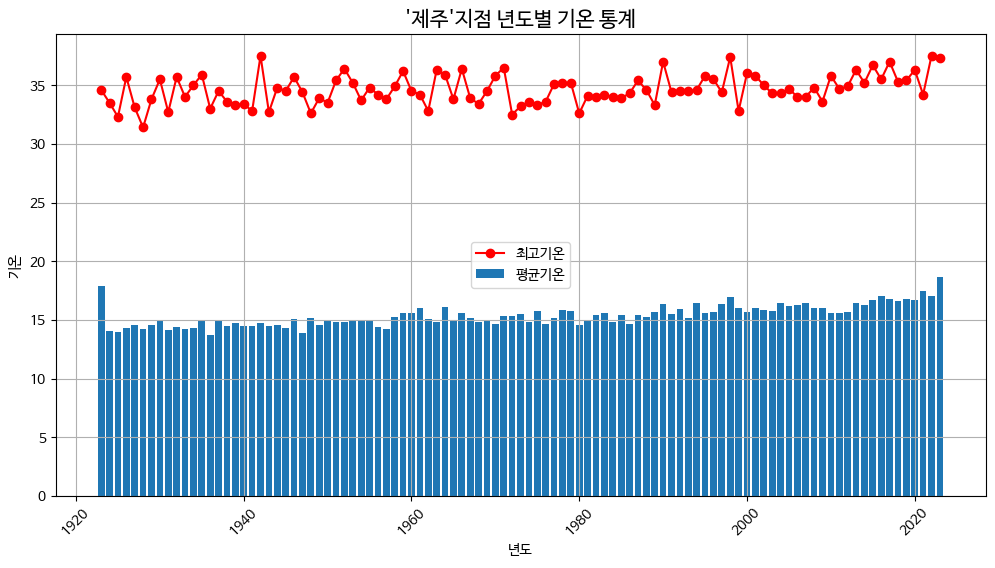

In [84]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

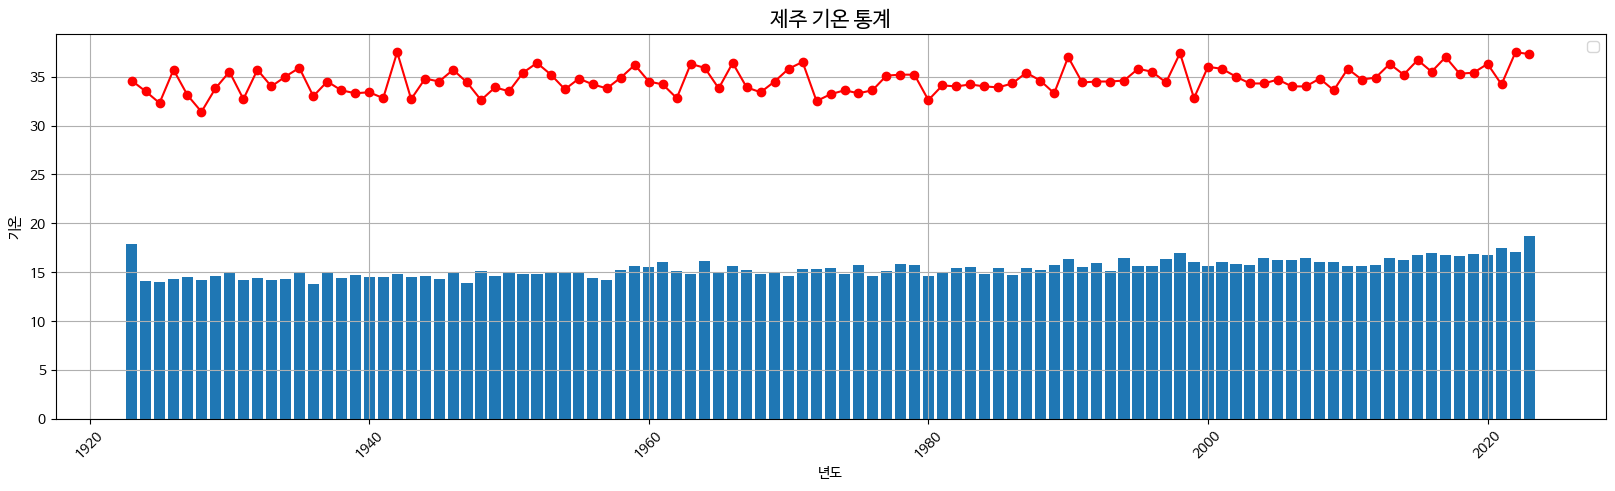

In [85]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

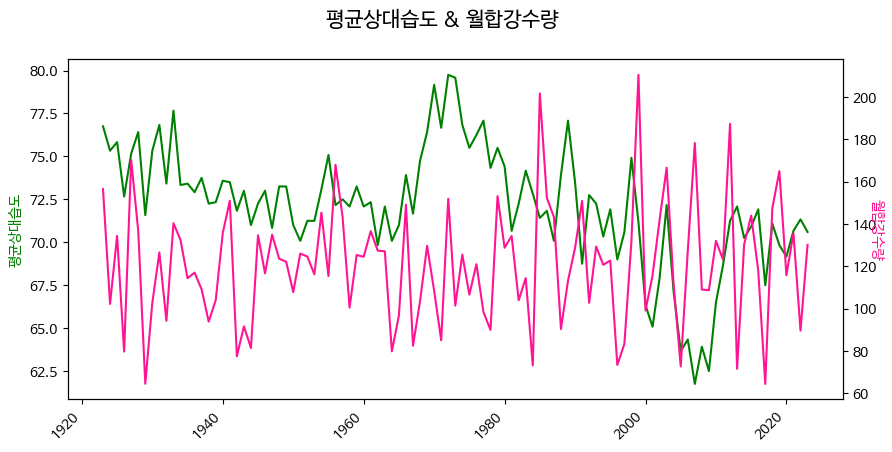

In [86]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
plt.rcParams['figure.figsize'] = (10, 5)   # 그래프 크기

fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기

plt.savefig('./graph.png')

plt.show()

-------

---------

끝!